In [1]:
#!/usr/bin/env python
# import analyzer
import importlib
from importlib import reload
import os, sys, glob, warnings, glob
import numpy as np
import scipy as sp
import joblib
import ROOT as root

import matplotlib.pyplot as plt
from matplotlib import collections, colors, transforms
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %matplotlib widget

Welcome to JupyROOT 6.24/06


In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# 1. Run simulation and tracker
  
    simulation -j2 -o ../fit_study/data/muon_500_GeV -q -s ../fit_study/muon_gun_tom_debug.mac energy 500 count 10
    tracker ../fit_study/data/muon_500_GeV/20230127/175313/run0.root ../fit_study/data/muon_500_GeV/20230127/175313


tracker ../data/w_to_muon/20230129/210801/run0.root ../data/w_to_muon/20230129/210801/

In [ ]:
# simulation -q -s file_reader.mac  pathname particle_parameters.tsv

In [16]:
filename = "~/jupyter/tracker_6layers/scripts/data/20230510/202354/run0.root"

# 2. Open file and print branches
tfile = root.TFile.Open(filename)
tree_name = ["integral_tree","box_run"][1]
Tree = tfile.Get(tree_name)

barnches = Tree.GetListOfBranches()
nevents = int(Tree.GetEntries())
branch_list = [barnches[i].GetName() for i in range(len(barnches))]
print(branch_list)

['NumHits', 'Hit_energy', 'Hit_time', 'Hit_detId', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Hit_weight', 'NumGenParticles', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_status', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mo1', 'GenParticle_mo2', 'GenParticle_dau1', 'GenParticle_dau2', 'GenParticle_mass', 'GenParticle_pt', 'GenParticle_eta', 'GenParticle_phi', 'COSMIC_EVENT_ID', 'COSMIC_CORE_X', 'COSMIC_CORE_Y', 'COSMIC_GEN_PRIMARY_ENERGY', 'COSMIC_GEN_THETA', 'COSMIC_GEN_PHI', 'COSMIC_GEN_FIRST_HEIGHT', 'COSMIC_GEN_ELECTRON_COUNT', 'COSMIC_GEN_MUON_COUNT', 'COSMIC_GEN_HADRON_COUNT', 'COSMIC_GEN_PRIMARY_ID', 'EXTRA_11', 'EXTRA_12', 'EXTRA_13', 'EXTRA_14', 'EXTRA_15']


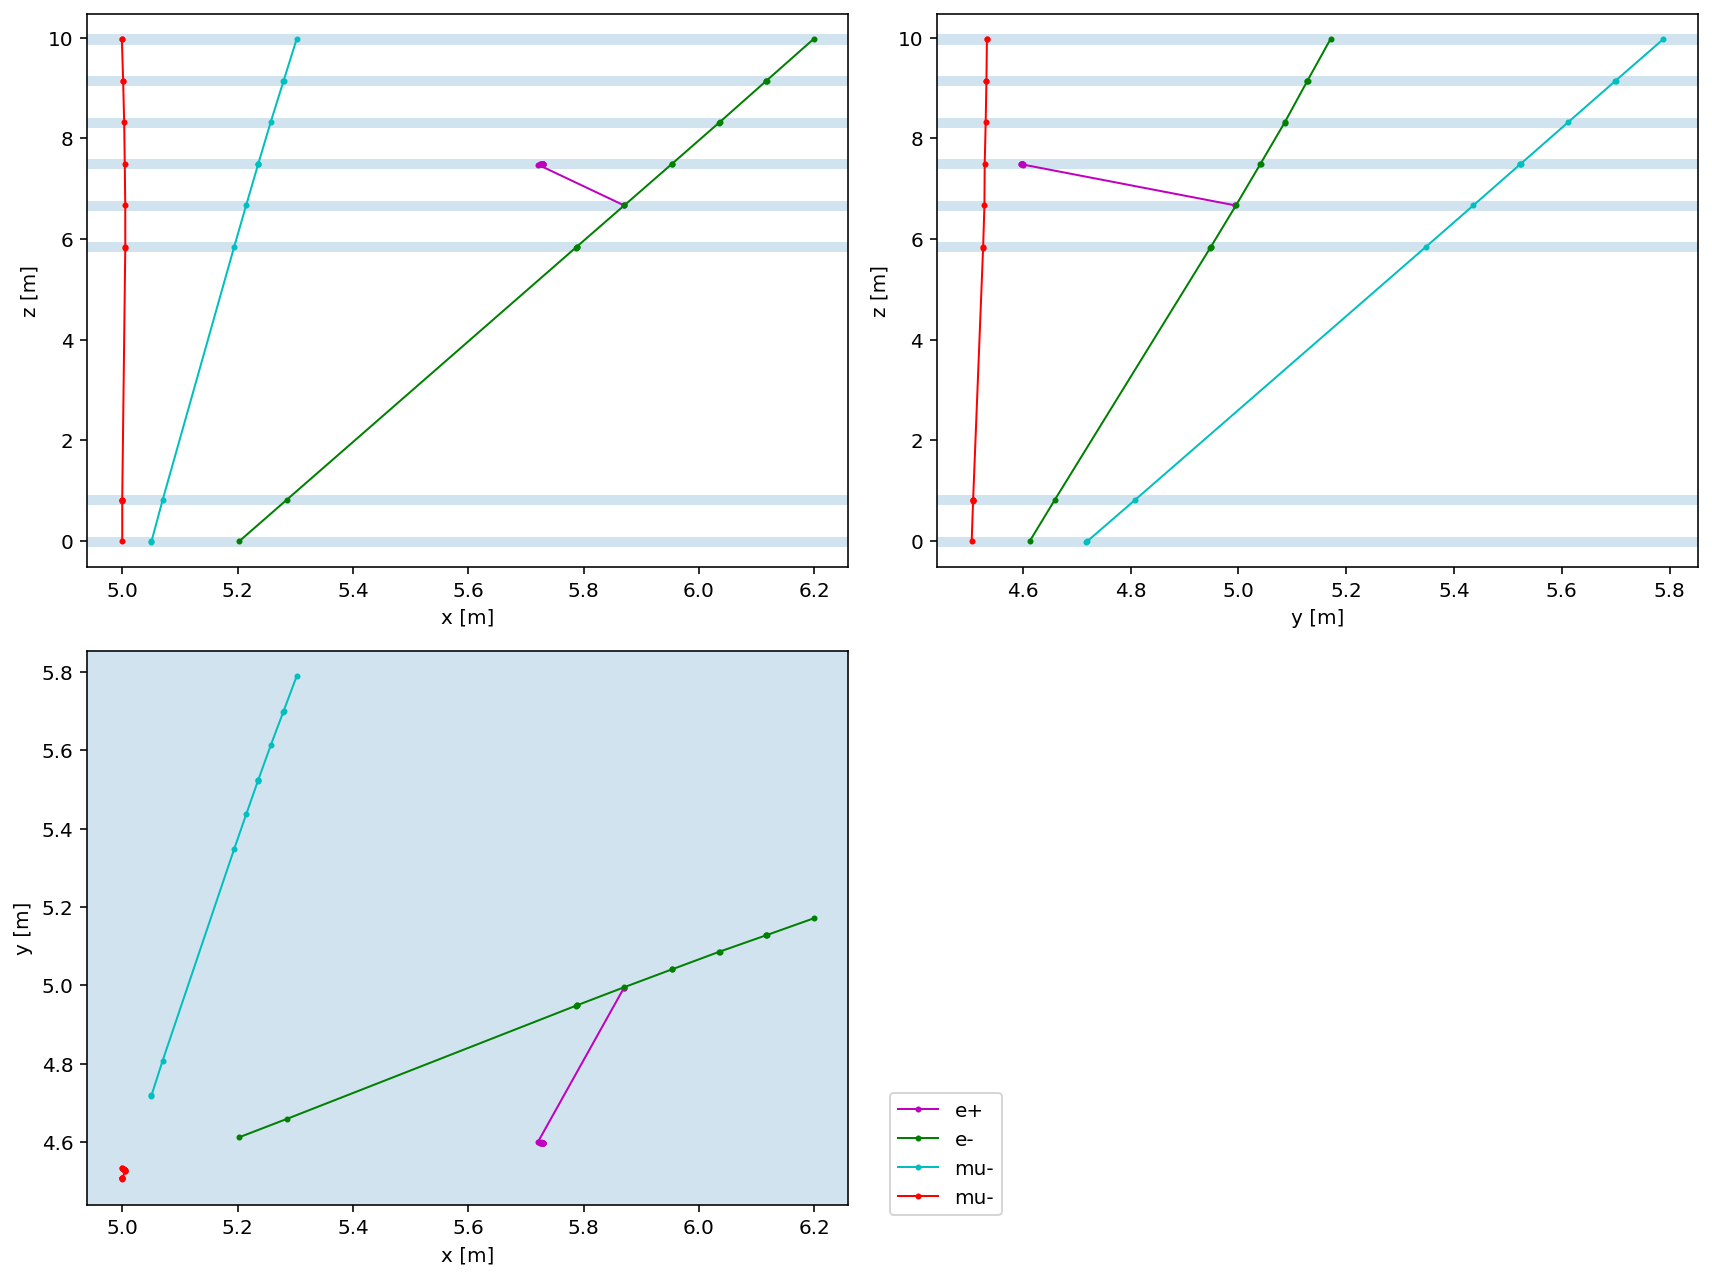

In [17]:
ev = event.Event(filename, 0, tree_name=tree_name)

ev.EventNumber=0

# Plot truth+digi
fig,axs=plt.subplots(2,2,figsize=(12,9))
fig = vis.plot_truth(ev,fig=fig, disp_det_view=True, disp_vertex=False, disp_first_hit=False);